## CNN
Convolutional Neural Networks are Deep Learning methods. They are connecting feature extraction with classification.
Convolution is a math operation which allows processing smaller bunch of pixels and learn better model.

Example architecture of CNN can looks like following ones:

<div style="text-align: left;">
  <img src="./images/CNN.png" width="700px" height="450px">
</div>


## Dataset
I decided to choose Car images datasets.

Link: https://www.kaggle.com/datasets/kshitij192/cars-image-dataset

This dataset consists of various types of cars. The dataset is organized into 2 folders (train, test) and contains subfolders for each car category. There are 4,165 images (JPG) and 7

Load train dataset

In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow        as tf
import PIL
import os

warnings.filterwarnings("ignore")



In [6]:
def set_seed(seed=1410):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    os.environ["TF_DETERMINISTIC_OPS"] = "1"

set_seed()

In [7]:
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

In [20]:
train_data = image_dataset_from_directory(
    "Cars/train",
    labels = "inferred",
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)

test_data = image_dataset_from_directory(
    "Cars/test",
    labels = "inferred",
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)

Found 3352 files belonging to 7 classes.
Found 813 files belonging to 7 classes.


In [21]:
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label


In [25]:
train_data = (
    train_data
    .map(convert_to_float)
    .cache()    
)
test_data = (
    test_data
    .map(convert_to_float)
    .cache()
)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dropout, Dense, Conv2D, LeakyReLU, MaxPooling2D, Flatten

num_classes = 7

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(128,128,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [52]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [53]:
from keras.utils import to_categorical

history = model.fit(
    train_data,
    validation_data = test_data,
    epochs=10,
    batch_size=64,
    shuffle=True
)

Epoch 1/10
53/53 [==============================] - 259s 5s/step - loss: 0.0000e+00 - accuracy: 0.0808 - val_loss: 0.0000e+00 - val_accuracy: 0.0824
Epoch 2/10
53/53 [==============================] - 230s 4s/step - loss: 0.0000e+00 - accuracy: 0.0808 - val_loss: 0.0000e+00 - val_accuracy: 0.0824
Epoch 3/10
53/53 [==============================] - 217s 4s/step - loss: 0.0000e+00 - accuracy: 0.0808 - val_loss: 0.0000e+00 - val_accuracy: 0.0824
Epoch 4/10
15/53 [=======>......................] - ETA: 2:27 - loss: 0.0000e+00 - accuracy: 0.0750

In [38]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 conv2d_11 (Conv2D)          (None, 124, 124, 32)      18464     
                                                                 
 flatten_5 (Flatten)         (None, 492032)            0         
                                                                 
 dense_5 (Dense)             (None, 10)                4920330   
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 4,940,597
Trainable params: 4,940,597
Non-trainable params: 0
_________________________________________________________________


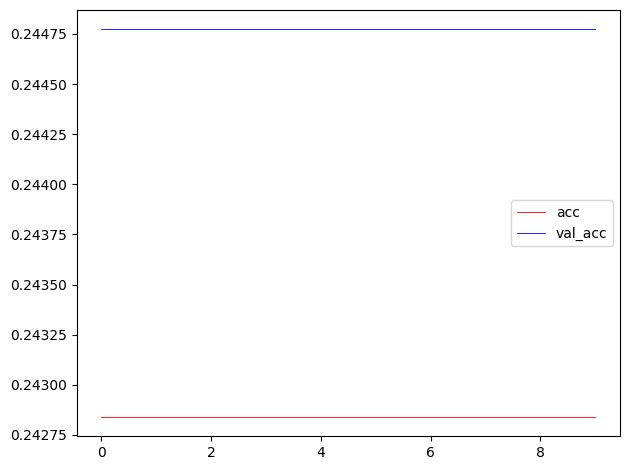

In [44]:
plt.plot(history.history['accuracy'], color="red", linewidth=0.6, label="acc")
plt.plot(history.history['val_accuracy'], color="blue", linewidth=0.6, label="val_acc")
plt.legend()
plt.tight_layout()
plt.show()